1. Configuración del ambiente

In [1]:
 !python -V

Python 3.10.11


In [2]:
pip show Pandas

Name: pandas
Version: 1.5.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, python-dateutil, pytz
Required-by: altair, arviz, cmdstanpy, cufflinks, datascience, db-dtypes, dopamine-rl, fastai, google-colab, gspread-dataframe, holoviews, mizani, mlxtend, pandas-datareader, pandas-gbq, plotnine, prophet, pymc, seaborn, sklearn-pandas, statsmodels, vega-datasets, xarray, yfinance


In [3]:
pip show Numpy

Name: numpy
Version: 1.22.4
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: albumentations, altair, arviz, astropy, autograd, blis, bokeh, chex, cmdstanpy, contourpy, cufflinks, cvxpy, datascience, db-dtypes, dopamine-rl, ecos, flax, folium, gensim, gym, h5py, holoviews, hyperopt, imageio, imbalanced-learn, imgaug, jax, jaxlib, librosa, lightgbm, matplotlib, matplotlib-venn, missingno, mizani, ml-dtypes, mlxtend, moviepy, music21, nibabel, numba, numexpr, opencv-contrib-python, opencv-python, opencv-python-headless, opt-einsum, optax, orbax-checkpoint, osqp, pandas, pandas-gbq, patsy, plotnine, prophet, pyarrow, pycocotools, pyerfa, pymc, pytensor, python-louvain, PyWavelets, qdldl, qudida, scikit-image, scikit-learn, scipy, scs, seaborn, shapely, sklearn-pandas, soxr, spacy, statsmodels, tabl

In [4]:
pip show Matplotlib

Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.10/dist-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: arviz, datascience, fastai, imgaug, matplotlib-venn, missingno, mizani, mlxtend, music21, plotnine, prophet, pycocotools, seaborn, wordcloud, yellowbrick


In [5]:
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

2. Obtención de datos

In [6]:
def importar_base_bitcoin():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  data_b = pd.DataFrame(yf.download('BTC-USD', period = '7d', interval = '5m'))
  return data_b
df_bitcoin = importar_base_bitcoin()
df_bitcoin

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-05-23 00:00:00+00:00,26855.960938,26857.056641,26851.968750,26854.099609,26854.099609,0
2023-05-23 00:05:00+00:00,26855.992188,26861.468750,26855.992188,26861.468750,26861.468750,1053696
2023-05-23 00:10:00+00:00,26860.580078,26860.580078,26858.892578,26860.427734,26860.427734,0
2023-05-23 00:15:00+00:00,26860.777344,26862.976562,26859.718750,26862.152344,26862.152344,0
2023-05-23 00:20:00+00:00,26864.820312,26867.335938,26863.314453,26867.335938,26867.335938,277504
...,...,...,...,...,...,...
2023-05-29 20:35:00+00:00,27668.076172,27668.076172,27662.925781,27664.019531,27664.019531,577536
2023-05-29 20:40:00+00:00,27668.517578,27699.939453,27668.517578,27697.646484,27697.646484,28363776
2023-05-29 20:45:00+00:00,27698.363281,27698.363281,27684.726562,27688.048828,27688.048828,6507520


In [7]:
def extraer_tendencias():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  url = "https://coinmarketcap.com/"
  response = urlopen(url)
  html = response.read()
  resp = requests.get(url)
  soup = BeautifulSoup (resp.content, 'html.parser')
  precio_actual = soup.find('a', href="/currencies/bitcoin/markets/").get_text()
  porcent_dia = soup.find('a', href="/currencies/bitcoin/markets/").findNext('span', class_='sc-97d6d2ca-0').get_text()
  ext_tend = soup.find('a', href="/currencies/bitcoin/markets/").findNext('span', {'class': ['icon-Caret-up', 'icon-Caret-down']})
  if 'icon-Caret-up' == ext_tend['class']:
    tendencia = 'Sube'
  else:
    tendencia = 'Baja'
  precio_actual = float(precio_actual.replace('$','').replace(',',''))
  porcent_dia = float(porcent_dia.replace('%',''))
  return [precio_actual, porcent_dia, tendencia]
datos_tendencia = extraer_tendencias()
datos_tendencia

[27690.89, 0.14, 'Baja']

3. Limpieza de datos

In [8]:
def limpieza_datos ():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  df_bitcoin2 = df_bitcoin.copy()
  df_bitcoin2.head()
  df_bitcoin_limpio = df_bitcoin.copy()
  df_bitcoin_limpio = df_bitcoin_limpio[['Close', 'Volume']]
  df_bitcoin_limpio.drop_duplicates (inplace = True )
  df_bitcoin_limpio = df_bitcoin_limpio[~(df_bitcoin_limpio['Close'].isnull())]
  df_bitcoin_limpio = df_bitcoin_limpio[(df_bitcoin_limpio['Volume'] > 0)]
  valor = df_bitcoin_limpio ['Close']
  Q1 = valor.quantile(0.25)
  Q3 = valor.quantile(0.75)
  IIQ = Q3 - Q1
  limite_inferior = Q1 - (1.5*IIQ)
  limite_superior = Q3 + (1.5*IIQ)
  valor = valor[((valor >= Q1) & (valor <=Q3))]
  media_bitcoin = valor.mean()
  return media_bitcoin
media_bitcoin = limpieza_datos()
media_bitcoin

27014.888895488595

4. Tomar decisiones

In [9]:
def tomar_decisiones ():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  if ((precio_actual >= media_bitcoin) & (tendencia == 'Baja')):
    algoritmo_decision = 'Vender'
  elif ((precio_actual < media_bitcoin) & (tendencia == 'Alta')):
    algoritmo_decision = 'Comprar'
  else:
    algoritmo_decision = ''
  return algoritmo_decision
algoritmo_decision = tomar_decisiones()
algoritmo_decision

'Vender'

5. Visualización

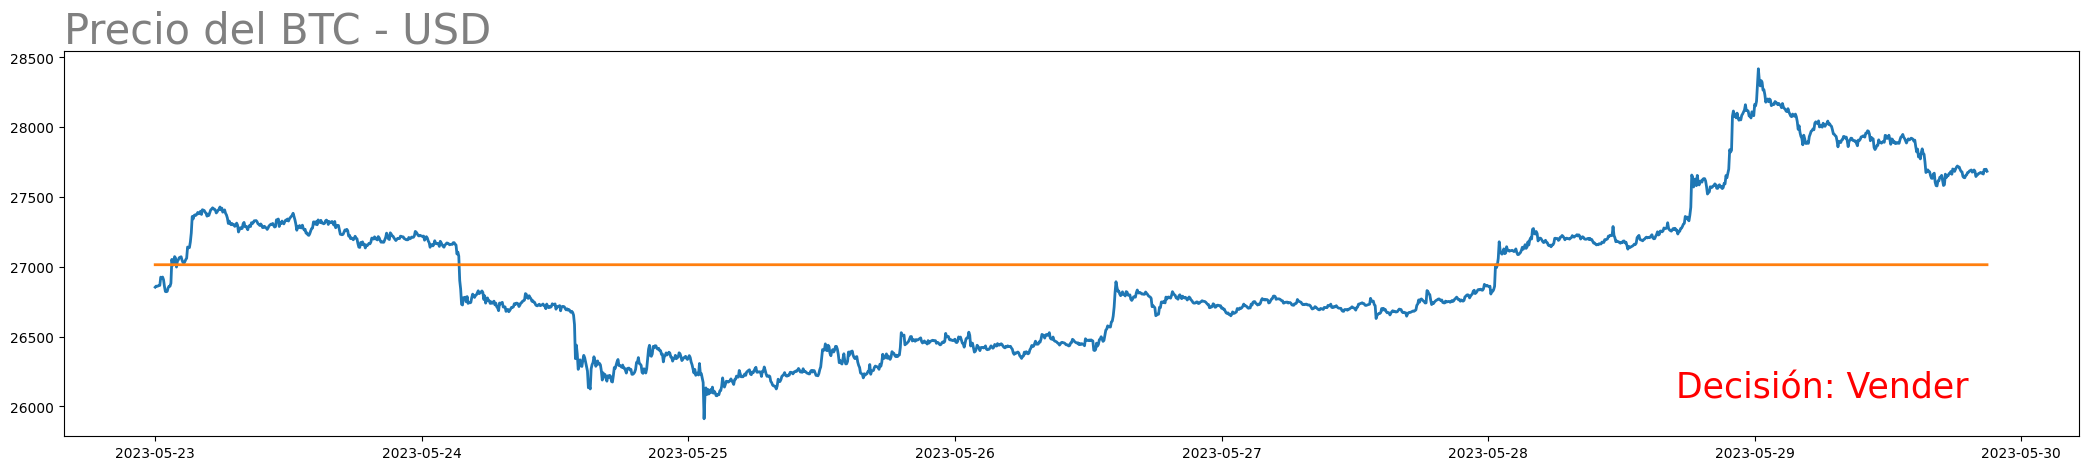

In [10]:
def visualizacion ():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  df_bitcoin ['Promedio'] = media_bitcoin
  plt.rc('figure', figsize = (26,5))
  plt.plot(df_bitcoin[['Close','Promedio']], linewidth = 2)
  plt.title('Precio del BTC - USD', {'fontsize': 30}, color = 'gray', loc = 'left')
  plt.annotate(text = ('Decisión: '+ str(algoritmo_decision)), xy=(0.8,0.1), xycoords='axes fraction', fontsize = 25, color = 'red')
  plt.show()
visualizacion ()

6. Automatización

[*********************100%***********************]  1 of 1 completed


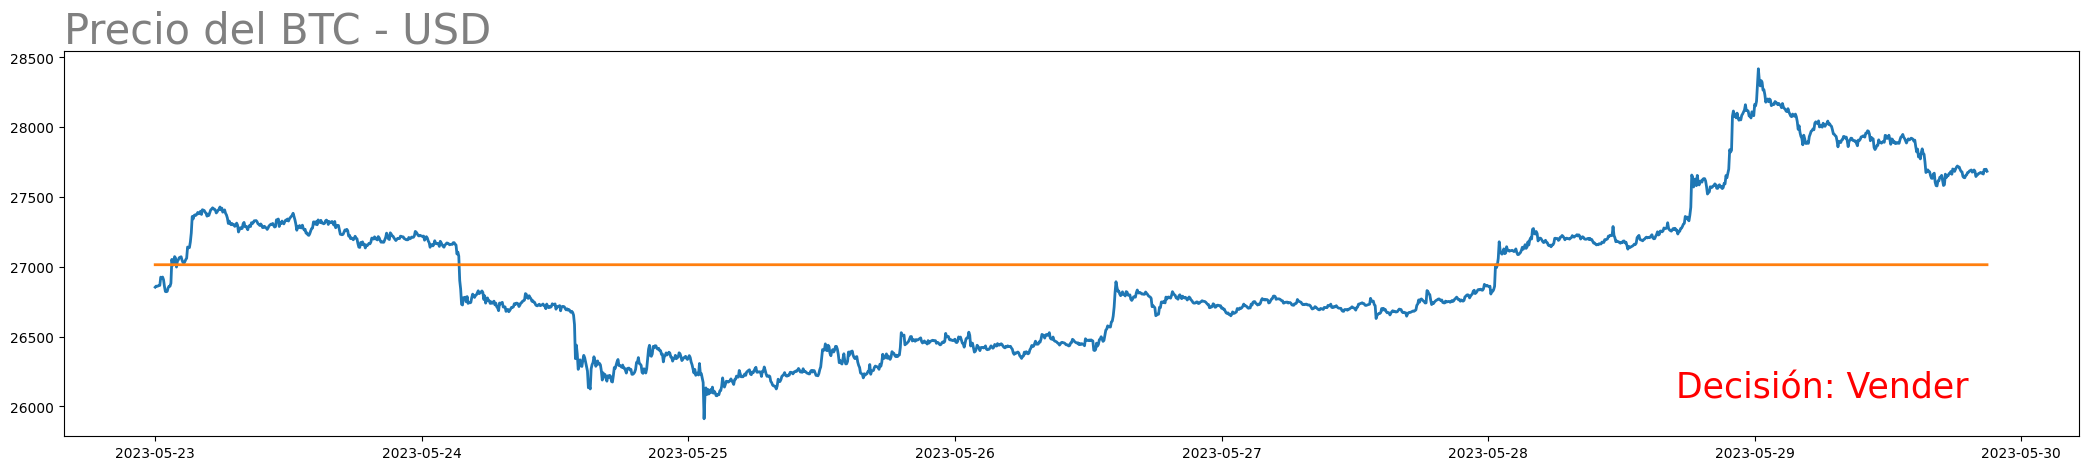

KeyboardInterrupt: ignored

In [13]:
while (True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decisiones()
  visualizacion()
  time.sleep(300)